11501568/11490434 [==============================] - 0s 0us/step


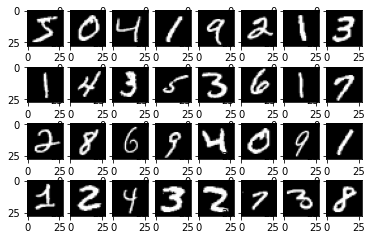

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from matplotlib import pyplot

# MNISTのデータを読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# データを4x8に出力
for i in range(0, 32):
    pyplot.subplot(4, 8, i + 1)
    pyplot.imshow(x_train[i], cmap='gray')

pyplot.show()


In [2]:
# データを28*28=784の一次元配列に変換
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

テキストP277のOneHotエンコーディングの方法はエラーになります！

In [3]:
# ラベルデータをone-hotベクトルに直す
y_train = keras.utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.to_categorical(y_test.astype('int32'),10)

AttributeError: ignored

こちらでやりましょう。

In [4]:
# Numpyユーティリティのインポート
from tensorflow.keras import utils as np_utils

# 10は省略可能(その場合 , も除去)
y_train = np_utils.to_categorical(y_train.astype('int32'),10)
y_test = np_utils.to_categorical(y_test.astype('int32'),10)

In [5]:
in_size = 28 * 28
out_size = 10

# モデル構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax')) 

# モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
model.fit(x_train, y_train,batch_size=20,epochs=20)

# モデルを評価
score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])


Epoch 1/20
3000/3000 [==============================] - 16s 5ms/step - loss: 0.1924 - accuracy: 0.9418
Epoch 2/20
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0772 - accuracy: 0.9754
Epoch 3/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0515 - accuracy: 0.9836
Epoch 4/20
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0379 - accuracy: 0.9877
Epoch 5/20
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 6/20
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0221 - accuracy: 0.9927
Epoch 7/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 8/20
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0165 - accuracy: 0.9945
Epoch 9/20
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0159 - accuracy: 0.9949
Epoch 10/20
3000/3000 [==============================] - 15s 5ms/step - l